In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings

%matplotlib inline
warnings.simplefilter('ignore')

## 1. Load Data and check for any Anomalies

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [12]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## 2. Exploratory Data Analysis

<AxesSubplot:>

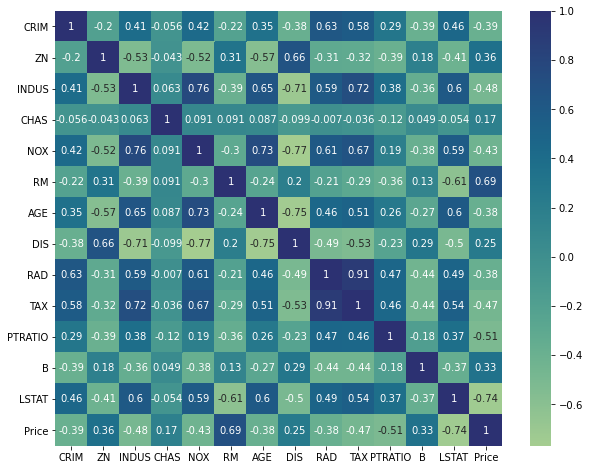

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(np.round(boston_df.corr(), 3), annot=True, cmap='crest')

* The strongest correlations are negative meaning the presence of those factors will lead to lower house prices

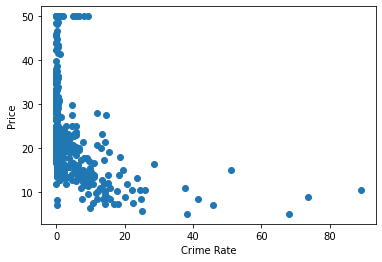

In [21]:
plt.scatter(boston_df['CRIM'], boston_df['Price'])
plt.ylabel('Price')
plt.xlabel('Crime Rate');

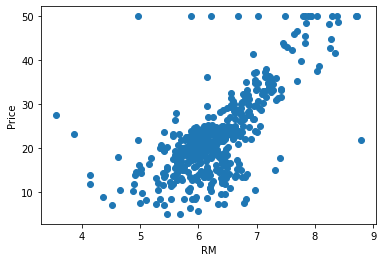

In [22]:
plt.scatter(boston_df['RM'], boston_df['Price'])
plt.ylabel('Price')
plt.xlabel('RM');

<AxesSubplot:xlabel='RM', ylabel='Price'>

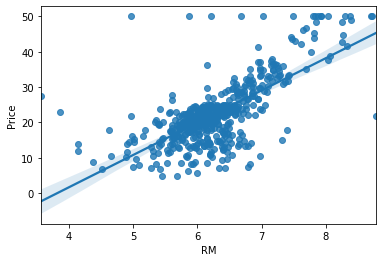

In [24]:
sns.regplot(x='RM', y='Price', data=boston_df)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

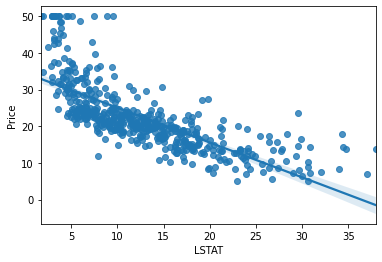

In [25]:
sns.regplot(x='LSTAT', y='Price', data=boston_df)

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

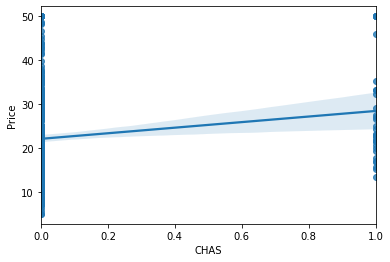

In [26]:
sns.regplot(x='CHAS', y='Price', data=boston_df)

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

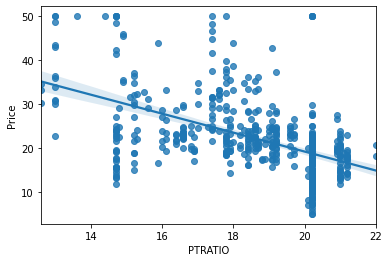

In [27]:
sns.regplot(x='PTRATIO', y='Price', data=boston_df)

### Dimensionality Reduction
* Check the correlation of our features and identify any redundant features as part of preprocessing or feature selection.

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=2)

scaler.fit(boston.data)  # scale the train set
X_scaled = scaler.transform(boston.data)

In [35]:
# Extract the principal components from the scaled train set
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [36]:
print('PCA components shape: {}'.format(pca.components_.shape))
print('PCA components: \n{}'.format(pca.components_))

PCA components shape: (2, 13)
PCA components: 
[[ 0.2509514  -0.25631454  0.34667207  0.00504243  0.34285231 -0.18924257
   0.3136706  -0.32154387  0.31979277  0.33846915  0.20494226 -0.20297261
   0.30975984]
 [-0.31525238 -0.32331288  0.112493    0.45482912  0.21911552  0.14933153
   0.3119778  -0.34906999 -0.27152071 -0.2394539  -0.30589697  0.23855945
  -0.07432204]]


<Figure size 720x144 with 0 Axes>

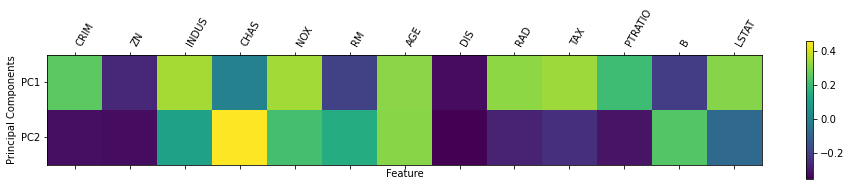

In [40]:
# visualize the coefficients using a heatmap
plt.figure(figsize=(10, 2))
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['PC1', 'PC2'])
plt.colorbar()
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=60, ha='left')
plt.ylabel('Principal Components')
plt.xlabel('Feature');

* Most features in PC1 have a relatively high correlation than in PC2. 
* Thus, they all can be used in training our model

## 3. Feature Engineering
* Adding more features to our train set through polynomials interactions

In [42]:
X = boston_df.iloc[:, :-1]     # features from dataframe
y = boston_df.iloc[:, -1]      # target from the dataframe

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(379, 13)

In [45]:
# scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Add interactions using polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly.shape

(379, 104)

In [52]:
X_train_poly

array([[-4.06795353e-01, -5.02811968e-01, -1.24707626e+00, ...,
         1.63630030e-01, -4.35965448e-01,  1.16155862e+00],
       [ 7.99171300e-03, -5.02811968e-01,  1.21828293e+00, ...,
         9.59783534e+00, -1.08792093e+00,  1.23316550e-01],
       [-4.13449569e-01,  3.64381369e-01, -1.12179223e+00, ...,
         1.06661815e-01, -4.00483115e-01,  1.50369394e+00],
       ...,
       [-4.15951072e-01,  2.96596138e+00, -1.31187834e+00, ...,
         1.35516844e-01, -3.36412304e-01,  8.35123036e-01],
       [ 9.26380655e-01, -5.02811968e-01,  1.00515608e+00, ...,
         8.11190879e+00, -4.29189080e+00,  2.27077586e+00],
       [-3.90207387e-01, -5.02811968e-01, -3.68648041e-01, ...,
         1.08567373e+01,  8.69314147e-01,  6.96072004e-02]])

## 4. Model Training
* Choose the best  <b>linear Algorithm</b> that <b>generalizes</b> best

In [63]:
def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    print('Train set score: {:.2f}'.format(model.score(X_train, y_train)))
    print('Test set score : {:.2f}'.format(model.score(X_test, y_test)))
    n_test = range(len(y_test))
    y_pred = model.predict(X_test)
    
    plt.plot(n_test, y_test, label='Actual Price')
    plt.plot(n_test, y_pred, label='Predicted Price')
    plt.xlabel('Test size')
    plt.ylabel('Price')
    plt.title(model)
    plt.legend(loc='center left', bbox_to_anchor=(1, .5))
        

Train set score: 0.94
Test set score : 0.78


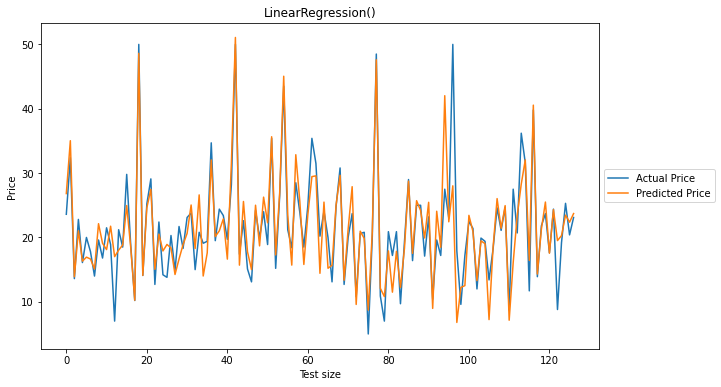

In [64]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
plt.figure(figsize=(10, 6))
evaluate_model(X_train_poly, X_test_poly, y_train, y_test, lr)

Train set score: 0.99
Test set score : 0.82


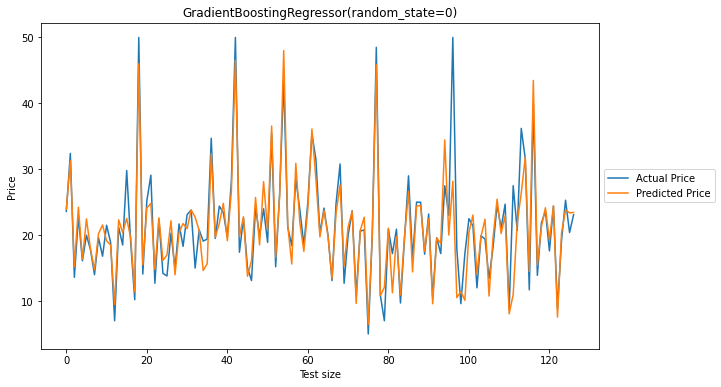

In [65]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
plt.figure(figsize=(10, 6))
evaluate_model(X_train_poly, X_test_poly, y_train, y_test, gbr)

Train set score: 0.98
Test set score : 0.82


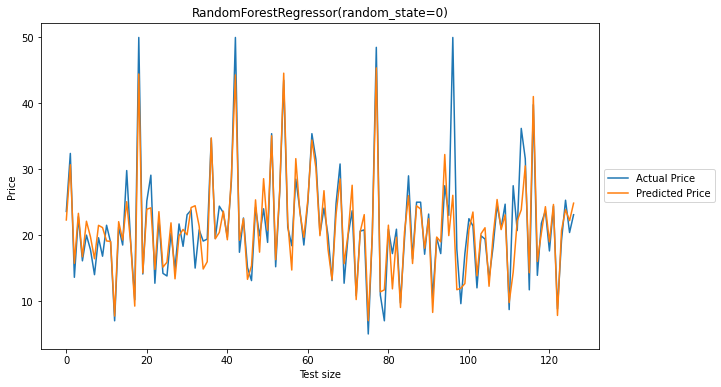

In [66]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure(figsize=(10, 6))
evaluate_model(X_train_poly, X_test_poly, y_train, y_test, forest)

* Genarally, both Random Forest and Gradient Boosting regressors are generalizing better than a Linear regression model. 
* For this project, we will use Random Forest,br>

#### Let's Tune our Model (hyperparameters)

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

forest = RandomForestRegressor()
forest_random = RandomizedSearchCV(estimator=forest, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, 
                                  random_state=42, n_jobs=-1)


In [72]:
forest_random.fit(X_train_poly, y_train)

forest_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.8min finished


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [76]:
# Train our model with the best features
model = RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', 
                              max_depth=None, bootstrap=False)

model.fit(X_train_poly, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400)

In [93]:
print('Train set score: {:.2f}'.format(model.score(X_train_poly, y_train)))
print('Test set score: {:.2f}'.format(model.score(X_test_poly, y_test)))

Train set score: 1.00
Test set score: 0.84


In [79]:
# predict the price
price_pred = model.predict(X_test_poly)


#### Assumptions

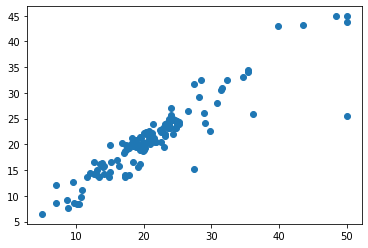

In [80]:
plt.scatter(y_test, price_pred);

In [82]:
# residuals i.e Deviation of predicted price from actual price
residuals = y_test - price_pred
residuals

173    0.36775
274   -0.07550
491   -2.51875
72    -0.38400
452   -0.81550
        ...   
418    1.23475
117   -0.81675
42     0.91025
322   -2.07675
347   -0.87225
Name: Price, Length: 127, dtype: float64

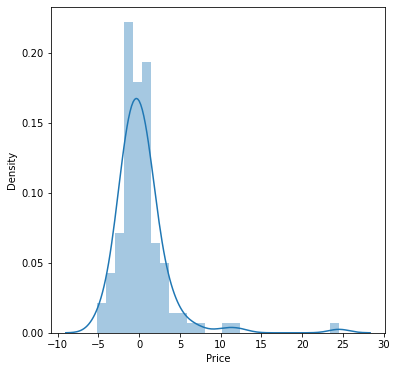

In [85]:
# plot the residuals
plt.figure(figsize=(6,6))
sns.distplot(residuals);

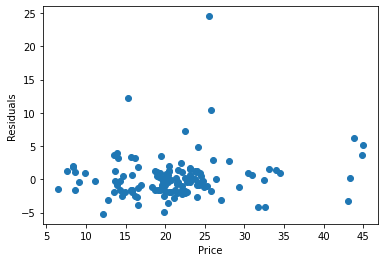

In [87]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(price_pred,residuals)
plt.ylabel('Residuals')
plt.xlabel('Price');

### New  Data Prediction

In [92]:
new_data = boston.data[0].reshape(1, -1)
new_data = scaler.transform(new_data)
new_data = poly.transform(new_data)
new_pred = model.predict(new_data)
print('Actual price: {}'.format(boston.target[0]))
print('Predicted price: {}'.format(new_pred))

Actual price: 24.0
Predicted price: [27.0855]


## 5. Pickling the Model file for Deployment

In [95]:
import pickle

In [97]:
pickle.dump(model, open('regmodel.pkl', 'wb'))

In [98]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [99]:
# same prediction as the one done above
pickled_model.predict(new_data)


array([27.0855])